<td>
    <a target="_blank" href="https://colab.research.google.com/github/jjerry-k/learning_framework/blob/main/02_Intermediate/Multi_Layer_Neural_Network/PyTorch.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
</td>

In [1]:
# Importing Modules

import torch
import torch.nn.functional as F
from torch import nn
from torch import optim
from torch.autograd import Variable
from torchvision import utils
from torchvision import datasets
from torchvision import transforms
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Loading Data
# MNIST dataset
mnist_train = datasets.MNIST(root='../../data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
print("Downloading Train Data Done ! ")

mnist_test = datasets.MNIST(root='../../data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)
print("Downloading Test Data Done ! ")

batch_size = 100

data_iter = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True, num_workers=1)

In [3]:
# Defining Model

# our model
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = nn.Linear(784, 256)
        self.linear2 = nn.Linear(256, 10)
    
    def forward(self, X):
        X = F.relu((self.linear1(X)))
        X = self.linear2(X)
        return X

model = Model()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [4]:
# Training loop
for epoch in range(5):
    avg_loss = 0
    total_batch = len(mnist_train) // batch_size
    for i, (batch_img, batch_lab) in enumerate(data_iter):
        X = Variable(batch_img.view(-1, 28*28))
        Y = Variable(batch_lab)
        
        y_pred = model.forward(X)
        
        loss = criterion(y_pred, Y)
        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        avg_loss += loss
        if (i+1)%100 == 0 :
            print("Epoch : ", epoch+1, "Iteration : ", i+1, " Loss : ", avg_loss.data.numpy()/(i+1))
    print("Epoch : ", epoch+1, " Loss : ", avg_loss.data.numpy()/total_batch)
print("Training Done !")

Epoch :  1 Iteration :  100  Loss :  0.7357794952392578
Epoch :  1 Iteration :  200  Loss :  0.5272069931030273
Epoch :  1 Iteration :  300  Loss :  0.44393310546875
Epoch :  1 Iteration :  400  Loss :  0.39480560302734374
Epoch :  1 Iteration :  500  Loss :  0.3601686096191406
Epoch :  1 Iteration :  600  Loss :  0.33538543701171875
Epoch :  1  Loss :  0.33538543701171875
Epoch :  2 Iteration :  100  Loss :  0.17751205444335938
Epoch :  2 Iteration :  200  Loss :  0.16525100708007812
Epoch :  2 Iteration :  300  Loss :  0.15944384256998698
Epoch :  2 Iteration :  400  Loss :  0.15666619300842285
Epoch :  2 Iteration :  500  Loss :  0.15136935424804687
Epoch :  2 Iteration :  600  Loss :  0.14837209065755208
Epoch :  2  Loss :  0.14837209065755208
Epoch :  3 Iteration :  100  Loss :  0.10980133056640624
Epoch :  3 Iteration :  200  Loss :  0.10941987037658692
Epoch :  3 Iteration :  300  Loss :  0.10734986623128255
Epoch :  3 Iteration :  400  Loss :  0.104974365234375
Epoch :  3 Itera

Accuracy :  97.52
Label :  [0]
Prediction :  [0]


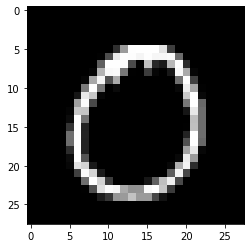

In [5]:
# Evaluation
test_img = mnist_test.data.view(-1, 28*28).type(torch.FloatTensor)
test_lab = mnist_test.targets
model.eval()
outputs = model.forward(test_img)
pred_val, pred_idx = torch.max(outputs.data, 1)
correct = (pred_idx == test_lab).sum()
print('Accuracy : ', correct.data.numpy()/len(test_img)*100)

# Testing
r = np.random.randint(0, len(mnist_test)-1)
X_single_data = mnist_test.data[r:r + 1].view(-1,28*28).float()
Y_single_data = mnist_test.targets[r:r + 1]

single_prediction = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_prediction.data, 1)[1].numpy())